In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(2000, 3000, 3) (2000, 3000, 3) (2000, 3000)


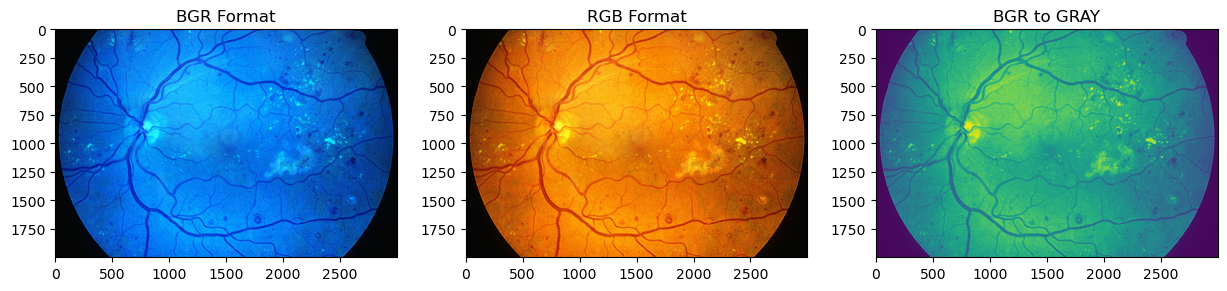

In [4]:
#reading image
path = ''
img = cv2.imread(path+"noise.jpg")
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img2 = cv2.imread(path+"noise.jpg",0) # or cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)


#function to see image
def imgshow(img=img,img1=img1,img2=img2, rows=1,columns=3):
    print(img.shape,img1.shape,img2.shape)
    fig = plt.figure(figsize=(15,8))
    #adds a subplot at 1st position
    fig.add_subplot(rows,columns,1)
    plt.title('BGR Format')
    plt.imshow(img)

    #adds a subplot at 2nd position
    fig.add_subplot(rows,columns,2)
    plt.title('RGB Format')
    plt.imshow(img1)

    #adds a subplot at 3rd position
    fig.add_subplot(rows,columns, 3)
    plt.title('BGR to GRAY')
    plt.imshow(img2)
    plt.show()
    
imgshow(img=img,img1=img1,img2=img2, rows=1,columns=3)

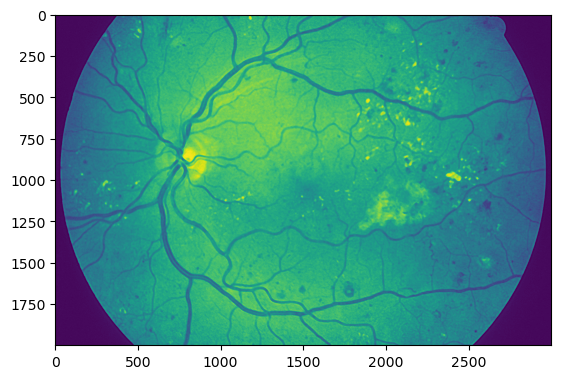

In [5]:
BGR2GRAY = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(BGR2GRAY)
plt.show()

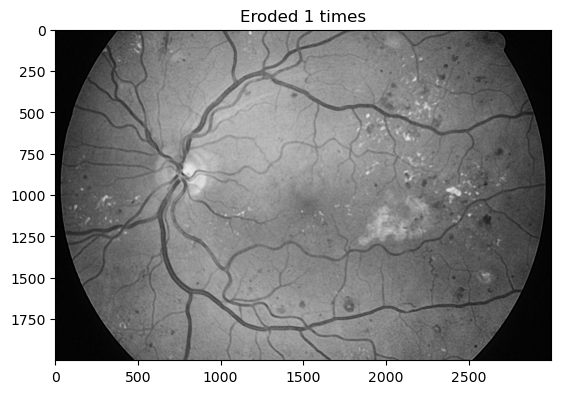

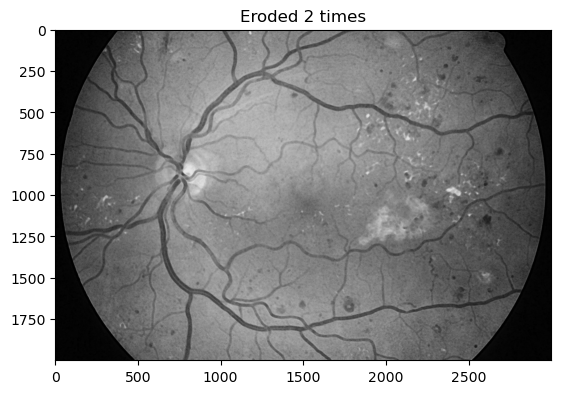

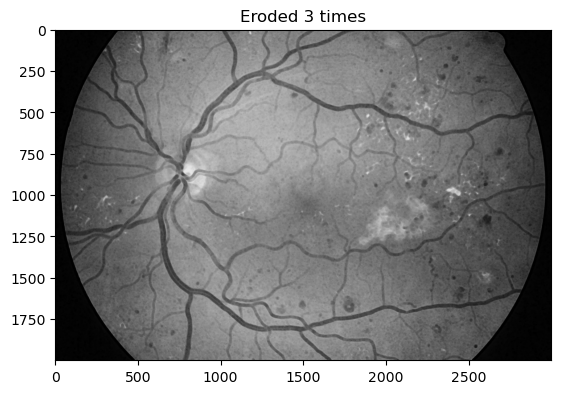

In [6]:
def plt_imshow(title, image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.show()

#eroding boundy of image upto 3 level, not using any "KERNEL" i.e. None
for i in range(0,3):
    eroded = cv2.erode(BGR2GRAY.copy(), None, iterations=i+1)
    plt_imshow("Eroded {} times".format(i+1), eroded)

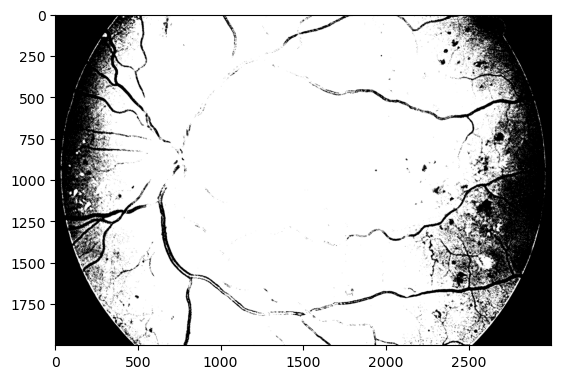

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [7]:
#binarize image
binr = cv2.threshold(BGR2GRAY, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
image = cv2.cvtColor(binr, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

print(binr)

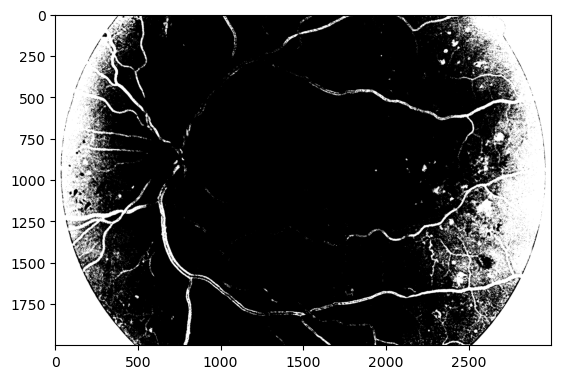

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [8]:
#invert image [it is advised to keep foreground in white]
invert = cv2.bitwise_not(binr)
image = cv2.cvtColor(invert, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

print(invert)

In [9]:
#define kernel of 5*5 size to use in erosion
kernel = np.ones((5,5), np.uint8) #check for 3*3 or 7*7 kernel size too
print(kernel)

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


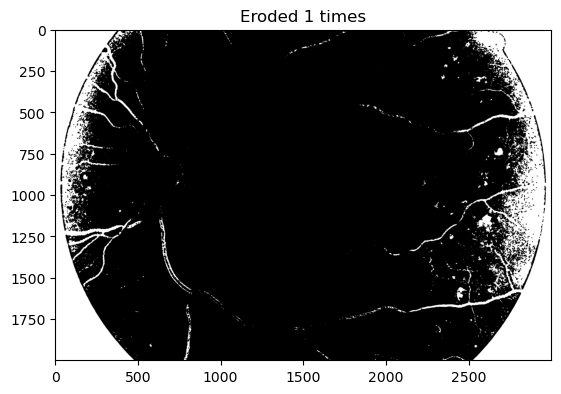

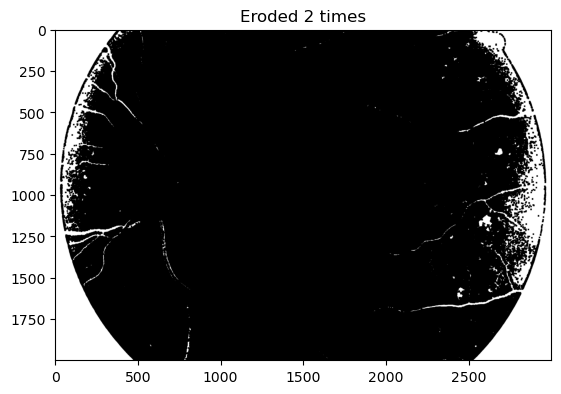

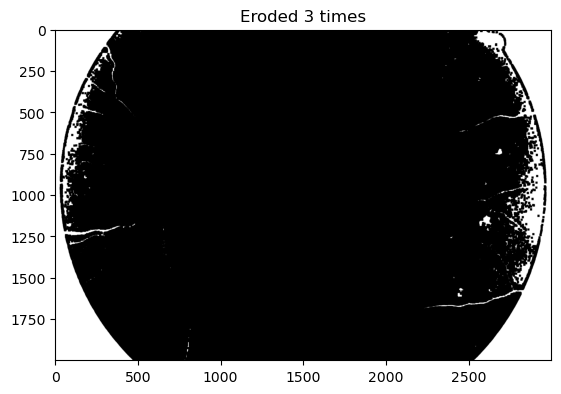

In [10]:
for i in range(0,3):
    eroded = cv2.erode(invert.copy(),kernel=kernel, iterations=i+1)
    plt_imshow("Eroded {} times".format(i+1), eroded)

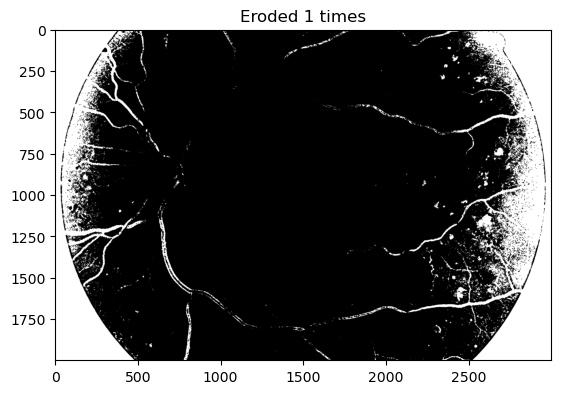

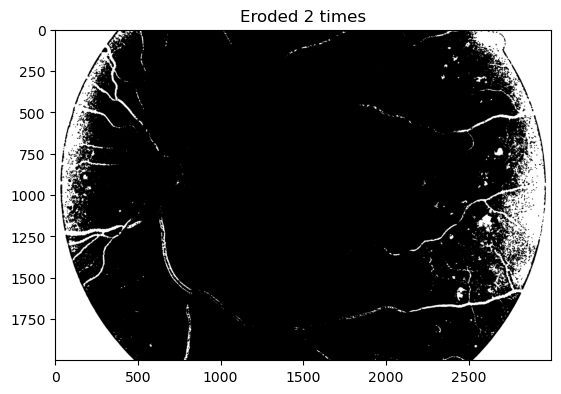

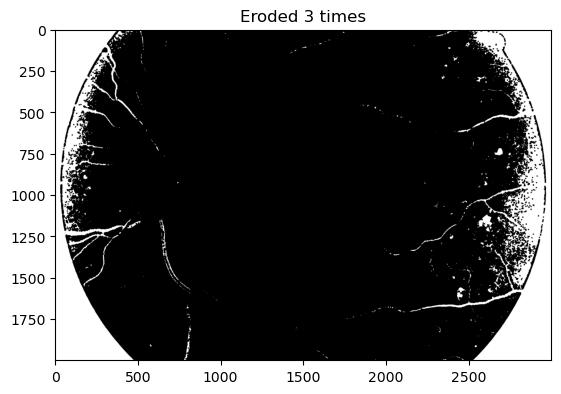

In [11]:
# applyig series of erosions by not using kernel
for i in range(0,3):
    eroded = cv2.erode(invert.copy(),kernel=None, iterations=i+1)
    plt_imshow("Eroded {} times".format(i+1), eroded)


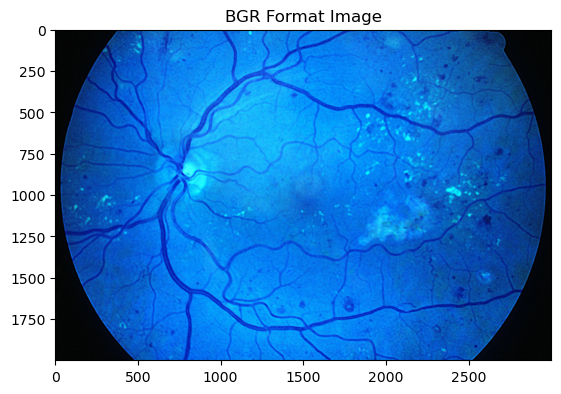

In [12]:
#Dilation

plt.imshow(img)
plt.title('BGR Format Image')
plt.show()

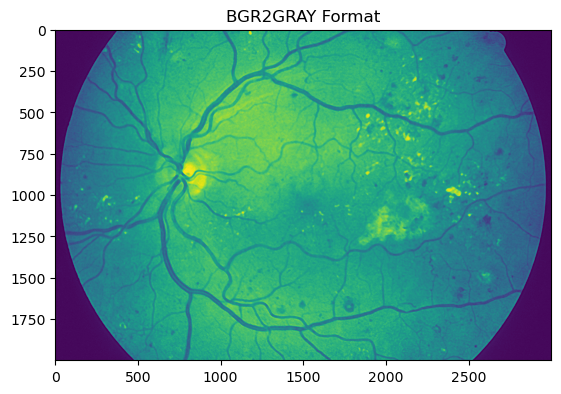

In [13]:
#converting to gray scale 
BGR2GRAY = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(BGR2GRAY)
plt.title('BGR2GRAY Format')
plt.show()

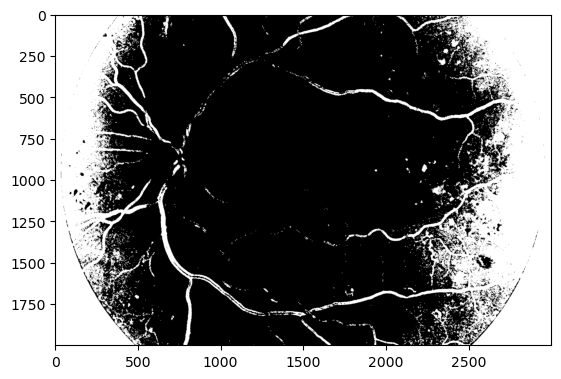

In [14]:
#binarize image
binr = cv2.threshold(BGR2GRAY,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
 
#define kernel
kernel = np.ones((3,3),np.uint8)
 
#invert image
invert = cv2.bitwise_not(binr)
 
#dilate image
dilation = cv2.dilate(invert,kernel,iterations=1)
 
#print output
plt.imshow(dilation, cmap='gray')
plt.show()

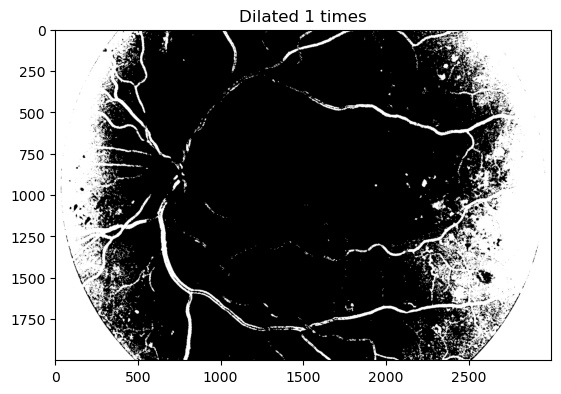

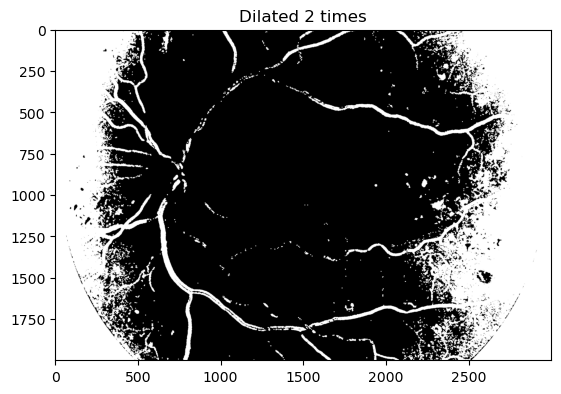

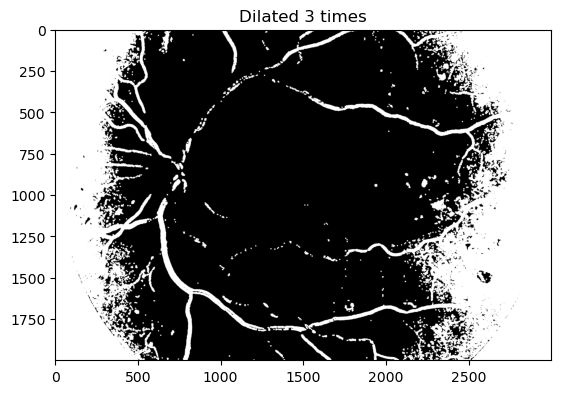

In [15]:
for i in range(0,3):
    dilated = cv2.dilate(invert.copy(),None,iterations= i+1)
    plt_imshow("Dilated {} times".format(i+1),dilated)

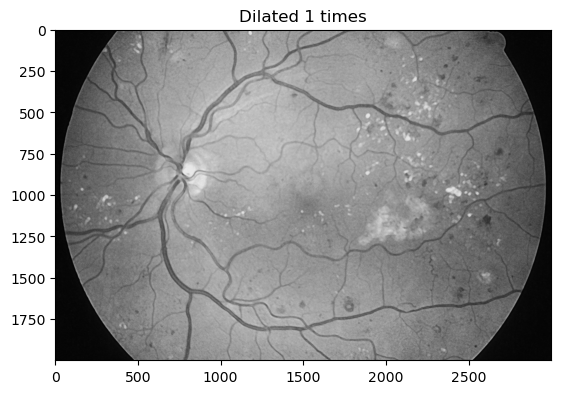

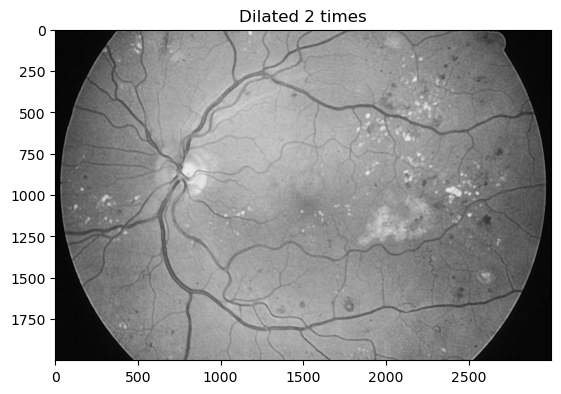

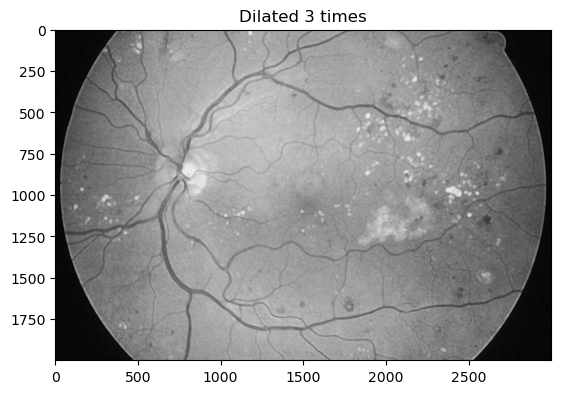

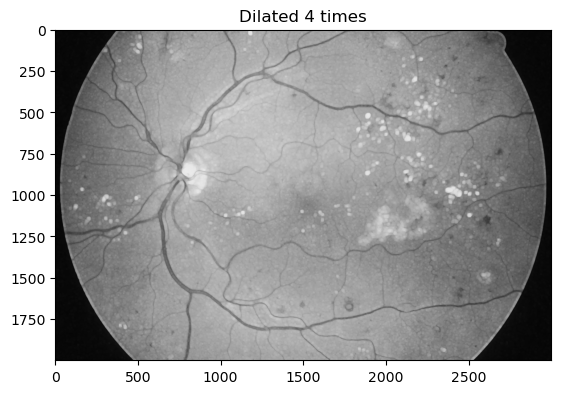

In [16]:
#applying series of dilations
for i in range(0,4):
    dilated = cv2.dilate(BGR2GRAY.copy(),None,iterations= i+1)
    plt_imshow("Dilated {} times".format(i+1),dilated)

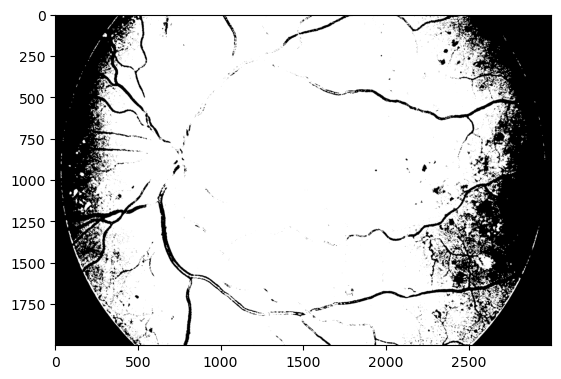

In [17]:
#Opening 

#converting to gray scale 
BGR2GRAY = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#binarize image
binr = cv2.threshold(BGR2GRAY,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
 
#define kernel
kernel = np.ones((3,3),np.uint8)
 
#opening image
opening = cv2.morphologyEx(binr,cv2.MORPH_OPEN,kernel,iterations=1)

#print output
plt.imshow(opening, cmap='gray')
plt.show()

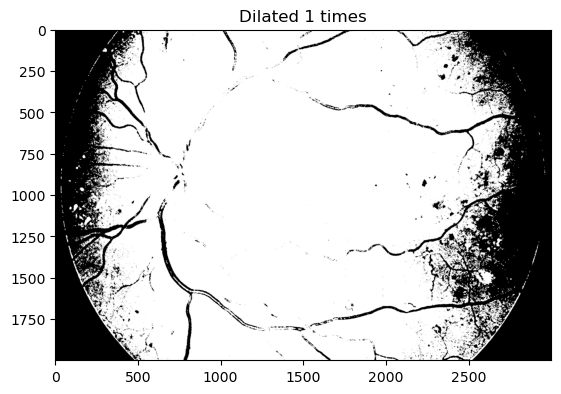

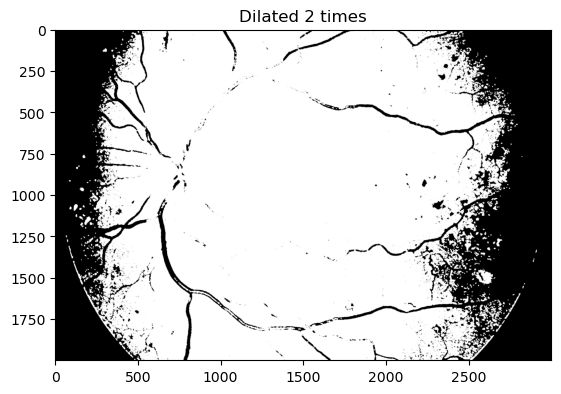

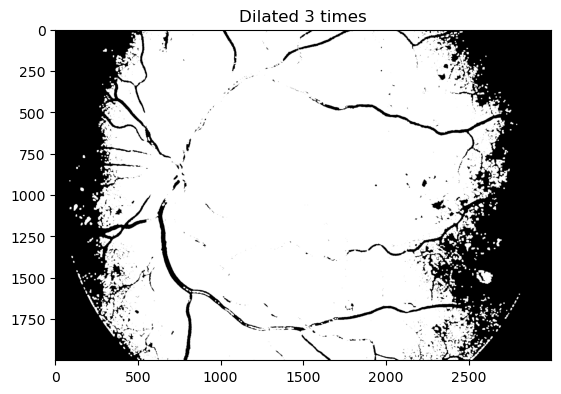

In [18]:
for i in range(0,3):
    opening = cv2.morphologyEx(binr.copy(),cv2.MORPH_OPEN,None,iterations= i+1)
    plt_imshow("Dilated {} times".format(i+1),opening)
    plt.show()

In [19]:
#kernel can also be defined like this
kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT, ksize=(3,3))
kernel1

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

In [ ]:
#NLMD 
# importing libraries
import numpy as np
import cv2
from matplotlib import pyplot as plt
  
# Reading image from folder where it is stored
img = cv2.imread('noise.jpg')
  
# denoising of image saving it into dst image
dst = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 15)
  
# Plotting of source and destination image
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(dst)
  
plt.show()